In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### DATA PREPROCESSING

In [2]:
# reading the test dataset
df1 = pd.read_csv("test.csv")

In [3]:
#previewing the data
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#reading the train dataset
df_train = pd.read_csv("train.csv")

In [5]:
#previewing the dataset
df_train.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# importing and reading the gender submission dataset
df3 = pd.read_csv("gender_submission.csv")
df3.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
# merging the gender submission dataset and the test dataset so that the test dataset can have the survived column
df_test = pd.merge(df1, df3, on = 'PassengerId', how = 'inner')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [8]:
# checking the column names
print(df_train.columns)
print(df_test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')


In [9]:
# reseting the indexes to make it easier to join both datasets
# df_train = df_train.reset_index(drop=True)
# df_test = df_test.reset_index(drop=True)

In [10]:
# printing the shape and previewing the train dataset
print(df_train.shape, df_train.head(5))


(891, 12)    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

In [11]:
# printing the shape and previewing the test dataset
print(df_test.shape, df_test.tail(5))

(418, 12)      PassengerId  Pclass                          Name     Sex   Age  SibSp  \
413         1305       3            Spector, Mr. Woolf    male   NaN      0   
414         1306       1  Oliva y Ocana, Dona. Fermina  female  39.0      0   
415         1307       3  Saether, Mr. Simon Sivertsen    male  38.5      0   
416         1308       3           Ware, Mr. Frederick    male   NaN      0   
417         1309       3      Peter, Master. Michael J    male   NaN      1   

     Parch              Ticket      Fare Cabin Embarked  Survived  
413      0           A.5. 3236    8.0500   NaN        S         0  
414      0            PC 17758  108.9000  C105        C         1  
415      0  SOTON/O.Q. 3101262    7.2500   NaN        S         0  
416      0              359309    8.0500   NaN        S         0  
417      1                2668   22.3583   NaN        C         0  


In [12]:
df = pd.concat([df_train, df_test], axis = 0)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [14]:
df.shape

(1309, 12)

### DATA WRANGLING

In [15]:
# checkingfor missing values in the data
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [16]:
# filling out the missing values
df['Age'] = df['Age'].fillna('not given')

In [17]:
df['Cabin'] = df['Cabin'].fillna('not specified')

In [18]:
df['Fare'] = df['Fare'].fillna('not given')

In [19]:
df['Embarked'] = df['Embarked'].fillna('not given')

In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

I decided to fill the missing values with 'not specified and 'not given' in order not to skew the data

In [21]:
df['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64

### EXPLORATORY DATA ANALYSIS

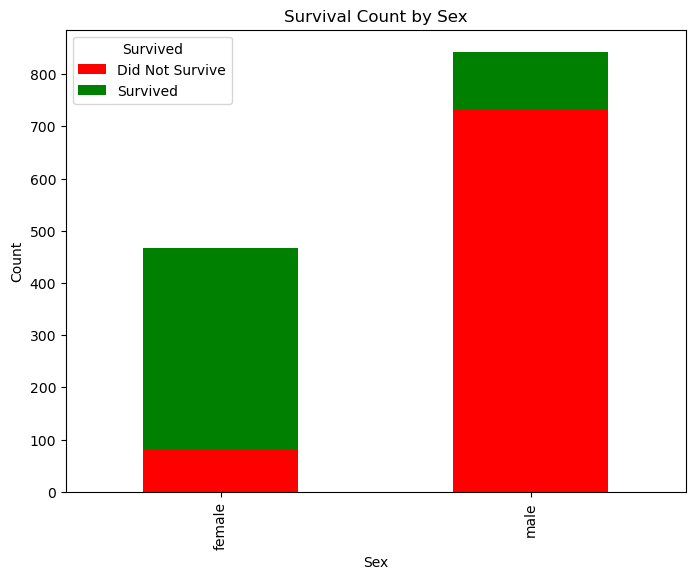

In [22]:
# Group by 'Sex' and 'Survived' to get counts
sex_survived_counts = df.groupby(['Sex', 'Survived']).size().unstack()

# Plotting the bar plot
sex_survived_counts.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8,6))

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Count by Sex')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])

# Show the plot
plt.show()


In [23]:
# checking if the xlabel is still a function
print(type(plt.xlabel))

<class 'function'>


According to the above plot, most females survived while males didn't showing that saving women was prioritised.


In [25]:
#counts pf the classes
Count_class = df['Pclass'].value_counts().sort_index()

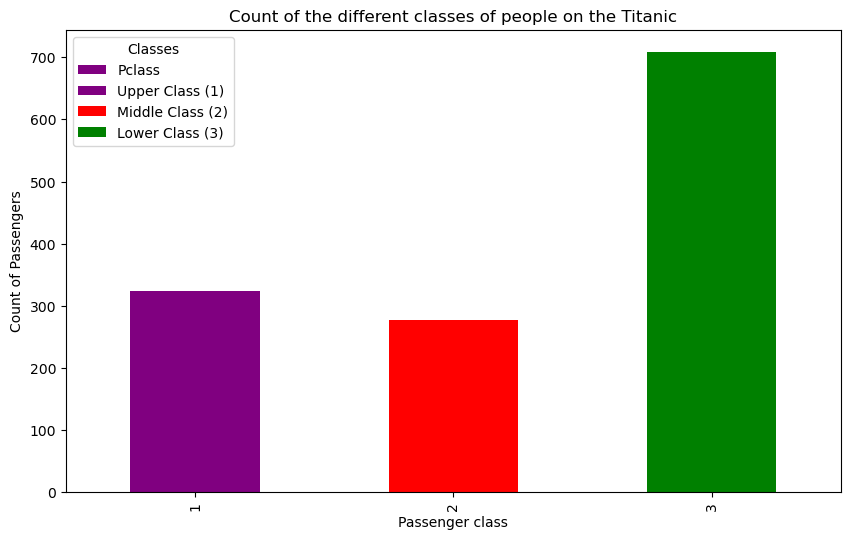

In [36]:
#predifining the labels and colors
labels = ['Upper Class (1)', 'Middle Class (2)','Lower Class (3)']
colors = ['Purple', 'red', 'green']

# plotting the bar
Count_class.plot(kind = 'bar', color = colors, figsize = (10,6))

# adding labels and a title
plt.xlabel('Passenger class')
plt.ylabel('Count of Passengers')
plt.title('Count of the different classes of people on the Titanic')

for i, label in enumerate(labels):
    plt.bar(0, 0, color=colors[i], label=label)

plt.legend(title='Classes')
# showing the plot
plt.show()

The above plot shows that the lower class were the majority followed by Upper class and the middle class were the least

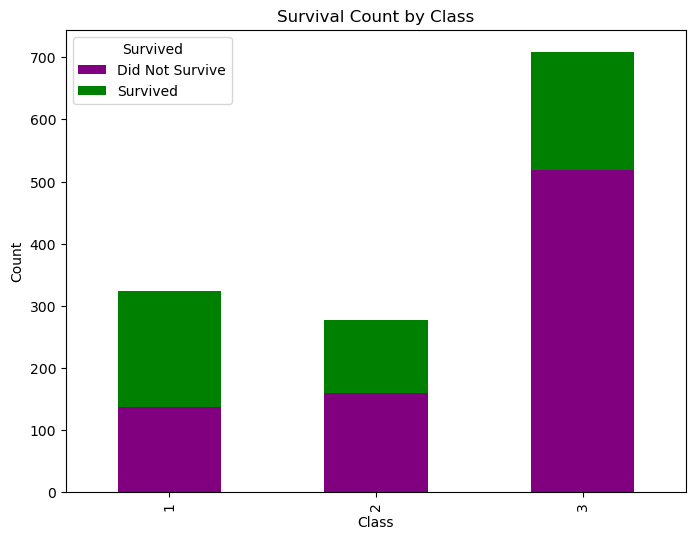

In [39]:
# Group by 'Pclass' and 'Survived' to get counts
sex_survived_counts = df.groupby(['Pclass', 'Survived']).size().unstack()

# Plotting the bar plot
sex_survived_counts.plot(kind='bar', stacked=True, color=['purple', 'green'], figsize=(8,6))

# Adding labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Survival Count by Class')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])

# Show the plot
plt.show()


The above plot shows the survival rate among different classes. However, the lower class having a majority of deaths can be attributed to them being the majority.

In [52]:
df['Age'].value_counts()

24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: Age, Length: 98, dtype: int64

In [45]:
# Convert "Not Given" to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Define age bins and labels
bins = [0, 18, 40, 100]  # Adjust bins as needed
labels = ['Child', 'Adult', 'Senior']

# Create a new column 'AgeGroup' with age categories
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# For rows where 'Age' was "Not Given", assign a special category
df['AgeGroup'] = df['AgeGroup'].cat.add_categories(['Not Given'])
df['AgeGroup'].fillna('Not Given', inplace=True)

# Display the first few rows to verify
print(df[['Age', 'AgeGroup']].head())


    Age AgeGroup
0  22.0    Adult
1  38.0    Adult
2  26.0    Adult
3  35.0    Adult
4  35.0    Adult


In [47]:
#getting the count for the different age groups
age_count = df['AgeGroup'].value_counts()

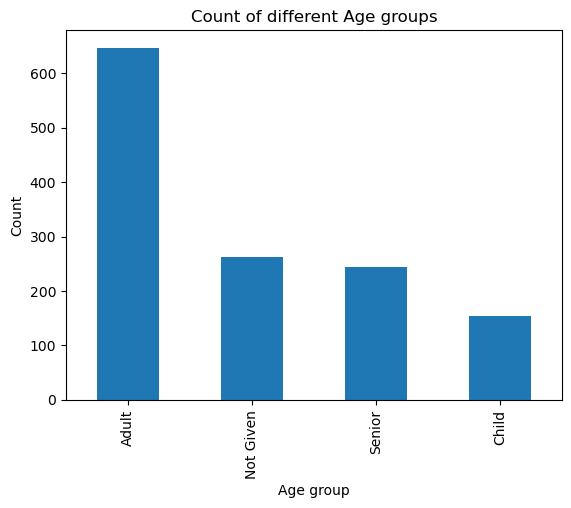

In [51]:
#plotting the bar
age_count.plot(kind = 'bar')
# Adding a title and labels
plt.title('Count of different Age groups')
plt.xlabel('Age group')
plt.ylabel('Count')
# showing the plot
plt.show()

I grouped the ages into different categories. 0-18 representing a child, 18-40 representing and adult and 40-100 a senior. However, some people did not give their ages so they remained as 'not given'. The above plot shows that the majority of individuals on board were adults which were the peple between ages 18 and 40.